##### Quantum Data Science 2023/2024
# Lecture 9 - Quantum Feature maps, Kernels and Support Vector Machines

<!-- no toc -->
### Contents 

1. [Recap: Support Vector Machines with kernels](#svm_kernels)
2. [Data encoding as a Quantum Feature map](#qfeaturemap)
3. [Quantum Kernel estimation](#qke)
4. [Quantum Kernel estimation in Qiskit](#qke)
5. [SVM's with Quantum Kernels for ad_hoc_dataset](#qke_ad_hoc)
6. [Caveats](#caveats)
7. [References](#references)

## 1. Recap: Support Vector Machines with kernels <a id='margins_intuition'></a>
    
*Support vector machines (SVMs)* are a powerful class of supervised learning algorithms (even today believed by some to be the best off the shelf supervised learning algorithm) for classification and regression problems. In this lecture, we will focus on the binary classification problem. The main idea behind SVMs is to find the hyperplane that best separates the data into different classes. 

Why hyperplanes ? From the *Occam’s razor principle*, hypothesis sets with smaller complexity provide better learning guarantees. A natural hypothesis set with relatively small complexity is that of *linear classifiers*, or hyperplanes.

$$ \mathcal{H} = \{x \mapsto sign(w^T x + b) : x \in \mathbb{R}^M, w \in \mathbb{R}^M, b \in \mathbb{R} \}$$ 


which is other way of saying what we had in our percetron algorithm with the heaviside step function.

General equation of the hyperplane $w^T x + b=0$. Consider labels $y \in \{-1,1\}$.

The sign operator returns the sign of the operation inside the brackets. Thus, the hypothesis labels positively all points falling on one side of the hyperplane and negatively all others (Figure below left)

<p align="center">
 <img width="1000" height="450" src="images/margins.png">
</p>

Which hyperplane should we choose from the infinite number of possible hyperplanes? We don't know yet, but one thing we can agree is that the points the further away from the hyperplane, the more confident we are about their classification right ? In the figure in the middle we notice that we need a very small change in the green hyperplane to misclassify a datapoint. Therefore, a good hyperplane would be one that has a large margin between points of different classes. This is the intuition behind SVMs and the reason why they are called *maximum margin classifiers* (illustrated in the figure on the right).

#### --- Dual formulation <a id='dual_formulation'></a>

However, notice that we are trying to optimize a function in which the weights $w$ are $N$ dimensional with $N$ being the number of features. This is a problem because the optimization problem becomes computationally expensive as the number of features increases. 

The dual formulation removes the dependence on the weights $w$ be noticing that the optimal weights can be expressed as a linear combination of the training data points if we set the derivatives to zero (convex problem -> KKT conditions), simplifying the problem to: 

$$
\begin{equation*}
L(\alpha) = \sum_{i=0}^{M-1} \alpha_i - \frac{1}{2} \sum_{i=0}^{M-1} \sum_{j=0}^{M-1} \alpha_i \alpha_j y_i y_j x_i \cdot x_j
\end{equation*}
$$

subject to the constraints $\alpha_i \geq 0$ and $\sum_{i=0}^{M-1} \alpha_i y_i = 0$. 

Thus, we optimize for as many parameters as the number of training data points, which is computationally more efficient, and after the optimization only support vectors will have non-zero $\alpha_i$ values.

The model can be expressed as:

$$
\begin{equation*}
f(x) =\sum_{i=0}^{M-1} \alpha_i y_i x_i \cdot x + b
\end{equation*}
$$

#### --- Kernel trick <a id='dual_formulation'></a>

Recall that the SVM is a linear model , thus it cannot classify non-linear data. However, we can use the kernel trick to map the data into a higher dimensional space where it may be easier to separate. 

It replaces the dot product $x_i \cdot x_j$ with a dot product in a feature space of higher dimensionality, where the data is linearly separable by a hyperplane.

<p align="center">
    <img width="1000" height="500" src="images/kernel_trick.png">
</p>



We replace the inner product with an inner product in a higher dimensional space:

$$
\begin{equation*}
L(\alpha) = \sum_{i=0}^{M-1} \alpha_i - \frac{1}{2} \sum_{i=0}^{M-1} \sum_{j=0}^{M-1} \alpha_i \alpha_j y_i y_j k(x_i,x_j)
\end{equation*}
$$

where $k$ is the kernel function that acts as a similarity measure between two points $x_i$ and $x_j$ in feature space: 

$$ K: \Omega \times \Omega \mapsto \mathbb{R} $$
$$ K: (x,y) \longmapsto k(x,y)=\langle\phi(x) , \phi(y)\rangle $$

The Kernel trick allow us to compare points in high dimensional feature spaces by using the original input vectors! 

**Mercer's condition**: $k(x,y) \geq 0$  and the kernel matrix $\mathcal{K}$:

$$ \mathcal{K} = \left[ k(x,y) \right]_{xy}$$ 

Thus, the kernel function is positive definite and symmetric $k(x,x') \geq 0$ and the optimization problem is convex.

Therefore, the Kernel matrix that compare each pair of points is also positive definite with diagonal ones $K_{ii} = 1$



  **stricly convex**. This is awesome because it tell us that we have a unique solution - Any local minimum is the global minimum. This is not true is general neural networks algorithms. Here there are well established theoretical guarantees. For instance the the number of datapoints necessary to generalize and guarantee a minimum prediction error - Sample complexity. See [1]
  
<p align="center">
 <img width="800" height="400" src="images/convex.jpeg">
</p>



----------------
#### Examples of kernels:

<p align="center">
<img width="/00" height="300" src="images/kernels.png">
</p>

----------------



---

$\gamma$ in the Gaussian (or Radial Basis Function RBF) kernel is a hyperparameter that controls the bandwidth of the kernel. 

Usually $\gamma=\frac{1}{2\sigma^2}$ where $\sigma$ is the standard deviation of the Gaussian. Variance $\sigma^2 = 1$ is a common choice. But it depends on the problem and fine tuning may be needed.



---

## 2 - Quantum Feature maps and kernels <a id="qfeaturemap"></a>

### If the kernel can be any positive definite function, then the kernel can also come from a quantum circuit ! All we need is a quantum feature map and a way of comparing data datapoins in quantum feature space!

why ? 


- Because quantum computers already work in high dimensional feature spaces - we can benefit from quantum computers that easily manipulate data that live in $2^n$ in  Hilbert space. We just need to map classical data to a quantum computer and then compare the data in quantum feature space. Right? 
  
    How? 

    

### Quantum Feature map:

$$ \phi: x \mapsto |\phi(x) \rangle $$

### Quantum kernel: 

For two points $x$ and $y$ , we can use the overlap: 

$$k(x,y) = |\langle \phi(x) | \phi(y) \rangle|^2 $$

as the kernel function where $|\$ and $\phi$ is the quantum feature map (mapping of classical data into quantum system).


This is indeed a kernel. Notice that this is also positive semidefinite ( $k(x,y) \geq 0 $)

## 3 - Quantum Kernel estimation <a id="qke"></a>


Recall that the overlap can be obtained with standard SWAP TEST / INVERSION TEST circuits (lecture 1 and 2).

<p align="center">
 <img width="850" height="350" src="images/swap_test_inversion_test.png">
</p>


#### Therefore , data encoding + swap tests is all we need to quantum kernels

#### Types of functions being generated from the data encoding 


<p align="center">
 <img width="/00" height="300" src="images/kernel_types.png">
</p>

*"Because quantum computers already work in high dimensional feature spaces - we can benefit from quantum computers that easily manipulate data that live in $2^n$ in  Hilbert space. We just need to map classical data to a quantum computer and then compare the data in quantum feature space. Right?"*
  

Well, not entirely true ... 

Notice that classical computers can efficiently compute said kernels. Therefore, the goal here is to exploit quantum processes that are not efficiently recovered by a classical computer and create powerful feature maps! 

One such example is the IQP encoding: 

<p align="center">
 <img width="800" height="250" src="images/IQP.png">
</p>

which is conjectured to be hard to simulate classically, as we increase the number of layers, especially for layers > 2. 



## 4 - Quantum Kernel estimation in Qiskit <a id="qke_qiskit"></a>


Qiskit provide a [Quantum Kernels module](https://qiskit-community.github.io/qiskit-machine-learning/apidocs/qiskit_machine_learning.kernels.html) providing a quantum kernel estimator algorithm for the overlap kernel. 

```python

class FidelityQuantumKernel(feature_map=None, fidelity=None, enforce_psd=True, evaluate_duplicates='off_diagonal', max_circuits_per_job=None)



In [1]:
from qiskit_machine_learning.kernels import FidelityQuantumKernel

In [2]:
# angle encoding kernel 

def angle_encoding(x, sigma="y"):

    n_qubits = len(x)

    features = QuantumRegister(n_qubits,"feature")
    qc = QuantumCircuit(features)

    for i in range(len(x)):
        angle = 2*x[i]
        if sigma == "y":
            qc.ry(angle, features[i])
        if sigma == "x":
            qc.rx(angle, features[i])
        if sigma == "z":
            qc.rz(angle, features[i])

    return qc

In [3]:
from qiskit.circuit import Parameter,ParameterVector
from qiskit import *
import numpy as np

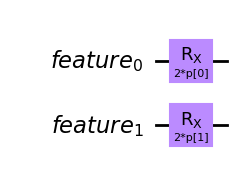

In [4]:

n_qubits = 2
p = ParameterVector('p', n_qubits)

encoding_circuit = angle_encoding(p, sigma="x")


encoding_circuit.draw('mpl')


Let $X = \{[1.0,1.0,1.0,1.0,1.0], [10.0,5.0,10.0,5.0,10.0], [1.0,1.0,1.0,1.0,1.0], [10.0,5.0,10.0,5.0,10.0]\}$ be an hypothetical dataset

In [83]:
X = np.array([[1.0,1.0,1.0,1.0,1.0], [10.0,5.0,10.0,5.0,10.0], [1.0,1.0,1.0,1.0,1.0], [10.0,5.0,10.0,5.0,10.0]])

# define the quantum data encoding 

n_qubits = 5
p = ParameterVector('p', n_qubits)

encoding_circuit = angle_encoding(p, sigma="x")

# define the kernel object 

kernel = FidelityQuantumKernel(feature_map=encoding_circuit, fidelity=None, enforce_psd=True, evaluate_duplicates='off_diagonal', max_circuits_per_job=None)



#### Evaluate the kernel on the dataset:


In [6]:
kernel_matrix = kernel.evaluate(X,X)

print(kernel_matrix)

[[1.         0.10443521 1.         0.10443521]
 [0.10443521 1.         0.10443521 1.        ]
 [1.         0.10443521 1.         0.10443521]
 [0.10443521 1.         0.10443521 1.        ]]


## 5. SVM's with Quantum Kernels for ad_hoc_dataset <a id="qke_ad_hoc"></a>

Consider the ad_hoc_dataset from the previous lecture with 10 features and two classes. 

Use the quantum kernel estimator in quantum qSVM algorithm to classify the data and compare with classical kernels



Qiskit also provides a quantum support vector classifier algorithm - the QSVC algorithm that extends the classical SVC algorithm from sklearn to use quantum kernels. 


In [99]:
from qiskit_machine_learning.datasets import ad_hoc_data
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [100]:
n_samples = 100
n_features = 10
n_classes = 2

In [101]:
XX,Y = make_classification(n_samples=n_samples, n_features=n_features, n_classes=n_classes)


Text(0.5, 1.0, 'ad_hoc dataset')

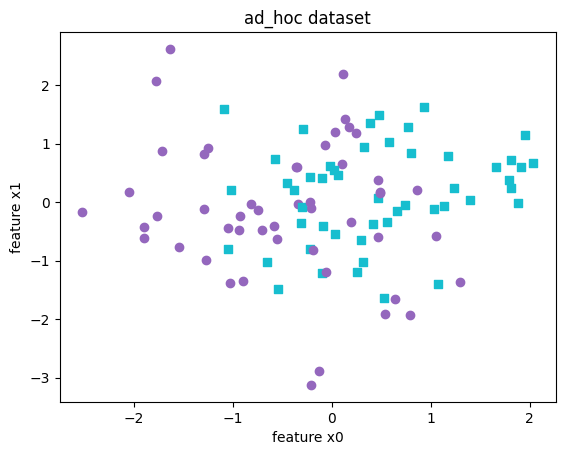

In [102]:
for feature, label in zip(XX,Y):    
    if label:
        color = 'C4'
        marker = 'o'
        plt.scatter(feature[0], feature[1], color=color, marker=marker)
    else:
        color = 'C9'
        marker = 's'
        plt.scatter(feature[0], feature[1], color=color, marker=marker)

plt.xlabel("feature x0")
plt.ylabel("feature x1")
plt.title("ad_hoc dataset")

In [105]:

# define the quantum data encoding 

n_qubits = 10
p = ParameterVector('p', n_qubits)

encoding_circuit = angle_encoding(p, sigma="x")

# define the kernel object 

kernel = FidelityQuantumKernel(feature_map=encoding_circuit, fidelity=None, enforce_psd=True, evaluate_duplicates='off_diagonal', max_circuits_per_job=None)



In [106]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=kernel)

qsvc.fit(XX, Y)

qsvc_score = qsvc.score(XX, Y)

print(qsvc_score)



In [94]:
kernel_matrix = kernel.evaluate(XX,Y)

print(kernel_matrix)

[[ 1.00000000e+00  9.91941878e-02  2.26127124e-01  1.20627057e-02
   2.08455221e-02  9.34454530e-01  5.91349943e-01  4.86061662e-01
   3.33360689e-01  2.89653723e-01  3.69880965e-03  2.34071408e-03
   4.80651528e-01  8.86961682e-02  1.40376425e-01  7.33292044e-02
   2.08455221e-02  2.65932917e-01  6.16281916e-01  2.82858037e-01]
 [ 9.91941878e-02  1.00000000e+00  1.22575090e-01  4.86061662e-01
   8.11018846e-01  2.05115077e-01  3.24124007e-01  2.81067389e-03
   5.29300155e-01  1.67726195e-16  5.66924131e-02  6.14029333e-01
   5.96751151e-02  2.48202398e-01  9.84291581e-01  1.36215185e-03
   4.23856969e-01  3.92710486e-03  7.17228193e-16  1.57084194e-02]
 [ 2.26127124e-01  1.22575090e-01  1.00000000e+00  7.55850692e-01
   4.66757196e-01  2.48202398e-01  2.85978379e-01  2.17154490e-03
   7.81800388e-02  3.40835851e-03  1.70454735e-01  7.10078972e-01
   6.44227203e-01 -5.09103749e-16  5.59408295e-02  7.81800388e-02
   7.14755034e-04  8.48567668e-01  2.48202398e-01  6.94584193e-01]
 [ 1.20

In [95]:
#or using directly sklearn SVC

from sklearn.svm import SVC

svc = SVC(kernel='precomputed')

svc.fit(kernel_matrix, Y)

svc_score = svc.score(kernel_matrix, Y)

print(svc_score)


#or using directly sklearn SVC without the kernel matrix

svc = SVC(kernel=kernel.evaluate)

svc.fit(XX, Y)

svc_score = svc.score(XX, Y)

print(svc_score)



0.7


0.7


## 6 - Caveats <a id="caveats"></a>

- Quantum kernels are not guaranteed to outperform classical kernels - classical simulation hardness does not imply usefulness of the encoding in solving a task.
- Expressivity of the kernel is important same as in VQC - Trainable kernels (kernel alignment) can be used to improve performance (see [2])
- Tradeoff between expressivity and kernel estimation - Vanishing similarity problem similar to barren plateaus in (VQC see [3])


## 7 - References <a id="references"></a>

* [1] - Mohri, Mehryar et al. “Foundations of Machine Learning.” Adaptive computation and machine learning (2012).
* [2] - Incudini,M et.al Automatic and effective discovery of quantum kernels https://arxiv.org/abs/2209.11144
* [3] - Thanasilp, S et.al Exponential concentration in quantum kernel methods https://arxiv.org/abs/2208.11060